**Importing all the libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

**Loading the dataset**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/dataset/snsdata.csv")

In [ ]:
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [ ]:
df.shape

(30000, 40)

**Getting info about features**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

**Checking for null values**

In [ ]:
df.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

**Checking the percentage of null values**

In [ ]:
df.isnull().sum()/df.shape[0] *100 

gradyear         0.000000
gender           9.080000
age             16.953333
friends          0.000000
basketball       0.000000
football         0.000000
soccer           0.000000
softball         0.000000
volleyball       0.000000
swimming         0.000000
cheerleading     0.000000
baseball         0.000000
tennis           0.000000
sports           0.000000
cute             0.000000
sex              0.000000
sexy             0.000000
hot              0.000000
kissed           0.000000
dance            0.000000
band             0.000000
marching         0.000000
music            0.000000
rock             0.000000
god              0.000000
church           0.000000
jesus            0.000000
bible            0.000000
hair             0.000000
dress            0.000000
blonde           0.000000
mall             0.000000
shopping         0.000000
clothes          0.000000
hollister        0.000000
abercrombie      0.000000
die              0.000000
death            0.000000
drunk       

In [ ]:
from numpy import NaN

**Counting the null values in column gender and age**

In [ ]:
NullCount={'Age':df['age'].isnull().sum(axis = 0),'Gender':df['gender'].isnull().sum(axis = 0)}
dm=pd.DataFrame(NullCount, index =['No.of missing values'])


In [ ]:
dm

,Age,Gender
No.of missing values,5086,2724


**Checking the constrainsts and keeping all the rows of age as null if age value is not between 13 and 20**

In [ ]:
df['age'].values[df['age'] > 20] = None
df['age'].values[df['age'] < 13] = None

**Checking if null values are increased or not**

In [ ]:
NullCount={'Age':df['age'].isnull().sum(axis = 0),'Gender':df['gender'].isnull().sum(axis = 0)}
dm=pd.DataFrame(NullCount, index =['No.of missing values'])
dm

,Age,Gender
No.of missing values,5523,2724


**checking about number of male users and number of female users**

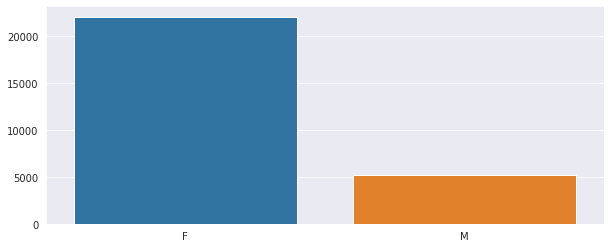

In [ ]:
genders=df.gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index,y=genders.values)
plt.show()

**Dummy encoding for gender column by creating three seperate columns as: M,F,NaN**


In [ ]:
dummy=pd.get_dummies(df['gender'],dummy_na=True)
dummy

,F,M,NaN
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,0,1
...,...,...,...
29995,0,1,0
29996,0,1,0
29997,0,1,0
29998,0,1,0


In [ ]:
df=df.merge(dummy,left_index=True,right_index=True)
df.head(5)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,clothes,hollister,abercrombie,die,death,drunk,drugs,F,M,NaN
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


In [ ]:
df1=df

In [ ]:
df2=df

**Now filling the null values of age by putting the mean of the grad year**

In [ ]:
df1['age']=df1['age'].fillna(value=df1['age'].mean())

In [ ]:
df1

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,clothes,hollister,abercrombie,die,death,drunk,drugs,F,M,NaN
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df1.isnull().sum()

gradyear           0
gender          2724
age                0
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
F                  0
M                  0
NaN                0
dtype: int64

In [ ]:
df2.groupby('gradyear', as_index=False)['age'].mean()

,gradyear,age
0,2006,18.410351
1,2007,17.628673
2,2008,16.857860
3,2009,16.112831


**Here we are creating seperate dataframe for all gradyear and calculting their mean**

In [ ]:
df3=df2[df2["gradyear"]==2006]
df4=df2[df2["gradyear"]==2007]
df5=df2[df2["gradyear"]==2008]
df6=df2[df2
        ["gradyear"]==2009]

**we will replace all the null values in all rows of gradyear with their mean** 

In [ ]:
df3['age']=df3['age'].fillna(18.65586)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**we will do this for all dataframes**

In [ ]:
df4['age']=df4['age'].fillna(17.70617)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df5['age']=df5['age'].fillna(16.76770)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df6['age']=df6['age'].fillna(15.81957)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Finally we will merge all the dataframes and this is our pre-processed dataset**

In [ ]:
data=pd.concat([df3,df4,df5,df6])

In [ ]:
data

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,clothes,hollister,abercrombie,die,death,drunk,drugs,F,M,NaN
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


**AS gender is a categorical column we will drop it**

In [ ]:
NullCount={'Age':data['age'].isnull().sum(axis = 0),'Gender':data['gender'].isnull().sum(axis = 0)}
df=pd.DataFrame(NullCount, index =['No.of missing values'])
df

,Age,Gender
No.of missing values,0,2724


In [ ]:
final=data.drop(['gender'], axis = 1)
final

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,clothes,hollister,abercrombie,die,death,drunk,drugs,F,M,NaN
0,2006,18.982,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2006,18.801,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2006,18.335,69,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,2006,18.875,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2006,18.995,10,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,16.115,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29996,2009,15.792,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29997,2009,15.784,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29998,2009,16.378,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 42 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   age           30000 non-null  float64
 2   friends       30000 non-null  int64  
 3   basketball    30000 non-null  int64  
 4   football      30000 non-null  int64  
 5   soccer        30000 non-null  int64  
 6   softball      30000 non-null  int64  
 7   volleyball    30000 non-null  int64  
 8   swimming      30000 non-null  int64  
 9   cheerleading  30000 non-null  int64  
 10  baseball      30000 non-null  int64  
 11  tennis        30000 non-null  int64  
 12  sports        30000 non-null  int64  
 13  cute          30000 non-null  int64  
 14  sex           30000 non-null  int64  
 15  sexy          30000 non-null  int64  
 16  hot           30000 non-null  int64  
 17  kissed        30000 non-null  int64  
 18  dance         30000 non-nu

In [ ]:
result1=final
result2=final
result3=final

**Before moving forward towards clustering we will plot pairplot for some features which we think may be a bit related or dependendent on each other**

**Those features are age,friends,M,F**

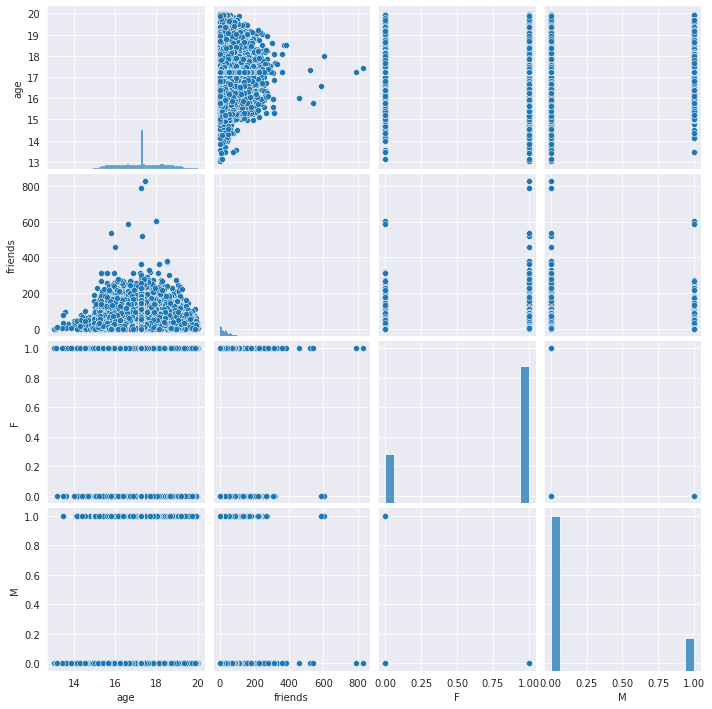

In [ ]:
sns.pairplot(result1[['age','friends','F','M']])

**MODEL1: K-means clustering**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(init="random",
      n_clusters=5,
    
    max_iter=300,
    random_state=42)
kmeans=kmeans.fit(result1[['age','friends']])

**we will implement k means clustering and will first consider two columns age and friends**

In [ ]:
kmeans.cluster_centers_

array([[ 17.25169371,  31.61297889],
       [ 17.123513  , 120.16245007],
       [ 17.16814274,  65.56831395],
       [ 17.06519272, 242.73846154],
       [ 17.29664577,   5.41887987]])

In [ ]:
identified_clusters=kmeans.fit_predict(result1)
identified_clusters

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([4, 4, 2, ..., 4, 4, 4], dtype=int32)

In [ ]:
data_with_clusters=data.copy()

In [ ]:
data_with_clusters['Clusters']=kmeans.labels_

In [ ]:
data_with_clusters.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,hollister,abercrombie,die,death,drunk,drugs,F,M,NaN,Clusters
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,2
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,4


**we will count how many datapoints are present in each cluster**

In [ ]:
data_with_clusters['Clusters'].value_counts()

4    14534
0     8953
2     4816
1     1502
3      195
Name: Clusters, dtype: int64

**In order to get a interpretation of our clusters formed we will plot scatter plot**

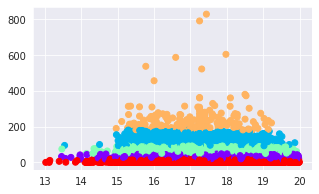

In [ ]:
plt.scatter(data_with_clusters['age'],data_with_clusters['friends'],c=data_with_clusters['Clusters'],cmap='rainbow')

In [ ]:
kmeans.inertia_

4843825.8157010265

In [ ]:
kmeans.labels_

array([4, 4, 2, ..., 4, 4, 4], dtype=int32)

In [ ]:
kmeans.n_iter_

22

** we will repeat the above process for the columns male and friends**

In [ ]:
kmeans1 = KMeans(init="random",
      n_clusters=5,
    
    max_iter=300,
    random_state=42)
kmeans1=kmeans1.fit(result2[['M','friends']])

In [ ]:
kmeans.cluster_centers_

array([[2.00750519e+03, 1.72516937e+01, 3.16129789e+01, 2.88953423e-01,
        2.66614543e-01, 2.41483302e-01, 1.66424662e-01, 1.65866190e-01,
        1.49893890e-01, 1.08566961e-01, 1.09125433e-01, 9.34882162e-02,
        1.54361666e-01, 3.38880822e-01, 2.12889534e-01, 1.42410365e-01,
        1.31464314e-01, 1.05216129e-01, 4.60851111e-01, 3.40891321e-01,
        4.54596225e-02, 7.98950073e-01, 2.57120518e-01, 4.78163744e-01,
        2.61253211e-01, 1.19401318e-01, 2.31207417e-02, 4.35273093e-01,
        1.17949291e-01, 1.19624707e-01, 2.65832682e-01, 3.73952865e-01,
        1.55813694e-01, 6.98090026e-02, 4.88104546e-02, 1.95353513e-01,
        1.25097733e-01, 9.03607729e-02, 5.65173685e-02, 7.50474701e-01,
        1.76588853e-01, 7.29364459e-02],
       [2.00767909e+03, 1.71235130e+01, 1.20162450e+02, 3.82157124e-01,
        3.02263648e-01, 2.66977364e-01, 2.67643142e-01, 1.99733688e-01,
        1.47137150e-01, 2.02396804e-01, 1.32490013e-01, 9.38748336e-02,
        1.44474035e-01,

In [ ]:
identified_clusters=kmeans1.fit_predict(result2)
identified_clusters


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([4, 4, 2, ..., 4, 4, 4], dtype=int32)

In [ ]:
data_with_clusters1=data.copy()

In [ ]:
data_with_clusters1['Clusters']=kmeans1.labels_

In [ ]:
data_with_clusters1.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,hollister,abercrombie,die,death,drunk,drugs,F,M,NaN,Clusters
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,2
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,4


In [ ]:
data_with_clusters1['Clusters'].value_counts()

4    14534
0     8953
2     4816
1     1502
3      195
Name: Clusters, dtype: int64

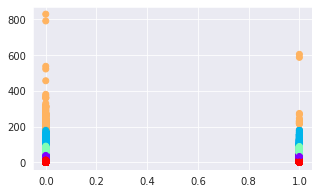

In [ ]:
plt.scatter(data_with_clusters1['M'],data_with_clusters1['friends'],c=data_with_clusters1['Clusters'],cmap='rainbow')


In [ ]:
kmeans.inertia_

4843825.8157010265

In [ ]:
kmeans.labels_

array([4, 4, 2, ..., 4, 4, 4], dtype=int32)

In [ ]:
kmeans.n_iter_

22

** we will repeat the same steps for column F and friends**

In [ ]:
kmeans2 = KMeans(init="random",
      n_clusters=5,
    
    max_iter=300,
    random_state=42)
kmeans2=kmeans2.fit(result3[['F','friends']])

In [ ]:
kmeans2.cluster_centers_

array([[  0.7504747 ,  31.61297889],
       [  0.81691079, 120.16245007],
       [  0.77595515,  65.56831395],
       [  0.85641026, 242.73846154],
       [  0.70207789,   5.41887987]])

In [ ]:
identified_clusters2=kmeans.fit_predict(result3)
identified_clusters2

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([4, 4, 2, ..., 4, 4, 4], dtype=int32)

In [ ]:
data_with_clusters2=data.copy()

In [ ]:
data_with_clusters2['Clusters']=kmeans2.labels_

In [ ]:
data_with_clusters2.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,hollister,abercrombie,die,death,drunk,drugs,F,M,NaN,Clusters
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,2
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,4


In [ ]:
data_with_clusters2['Clusters'].value_counts()

4    14534
0     8953
2     4816
1     1502
3      195
Name: Clusters, dtype: int64

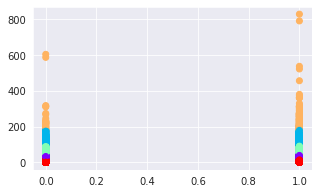

In [ ]:
plt.scatter(data_with_clusters2['F'],data_with_clusters2['friends'],c=data_with_clusters2['Clusters'],cmap='rainbow')


**Now before moving towards agglomerative clustering and DBSCAN clustering**

**we will create 3 datasubsets**

**subset1: age,friends**

**subset2:M,friends**

**subset3:F:friends**

In [ ]:

datasubset1=result2.loc[:,["age","friends"]]

In [ ]:
datasubset2=result2.loc[:,["M","friends"]]

In [ ]:
datasubset3=result2.loc[:,["F","friends"]]

In [ ]:
datasubset1.head(10)

,age,friends
0,18.982000,7
1,18.801000,0
2,18.335000,69
3,18.875000,0
4,18.995000,10
5,17.252429,142
6,18.930000,72
7,18.322000,17
8,19.055000,52
9,18.708000,39


**MODEL2: AGGLOMERATIVE CLUSTERING**

**Here we will calculate silhoutte score so will import that library**

**Here also we will do the way did in k means for all the three subsets and calculate their respect silhoutti score**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
import scipy.cluster.hierarchy as sch

**FOR DATASUBSET1**

In [ ]:
cluster=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
cluster.fit_predict(datasubset1)

array([1, 1, 2, ..., 1, 1, 1])

In [ ]:
c1=cluster.fit_predict(datasubset1)

In [ ]:
silhouette_score(datasubset1,c1)

0.5496845374750344

**FOR DATASUBSET2**

In [ ]:
cluster=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
cluster.fit_predict(datasubset2)

array([2, 2, 4, ..., 2, 2, 2])

In [ ]:
c2=cluster.fit_predict(datasubset2)

In [ ]:
silhouette_score(datasubset2,c2)

0.5969447840259849

**FOR DATASUBSET3**

In [ ]:
cluster=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
cluster.fit_predict(datasubset3)

array([2, 2, 3, ..., 2, 2, 2])

In [ ]:
c3=cluster.fit_predict(datasubset3)

In [ ]:
silhouette_score(datasubset3,c3)

0.5688052075004212

**MODEL3: DBSCAN**

** here also we will calculate separately for all the three subsets **

In [ ]:
from sklearn.cluster import DBSCAN

**Before implementing DBSCAN first we will try to implement the value of episilon and min number of samples using nearest neighbour**

**DATASUBSET1**

In [ ]:
from sklearn.neighbors import NearestNeighbors 
neighb = NearestNeighbors(n_neighbors=5) 
nbrs=neighb.fit(datasubset1) 
distances,indices=nbrs.kneighbors(datasubset1)

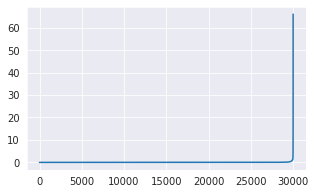

In [ ]:
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing t

In [ ]:
dbscancluster= DBSCAN(eps=3, min_samples=4)


In [ ]:
model=dbscancluster.fit(datasubset1)

In [ ]:
labels1=model.labels_

In [ ]:
sample_cores=np.zeros_like(labels1,dtype=bool)

In [ ]:
sample_cores[dbscancluster.core_sample_indices_]=True

In [ ]:
n_cluster=len(set(labels1))- (1 if -1 in labels1 else 0)

**For first subset the clusters as calculated by DBSCAN is 7**

In [ ]:
n_cluster

7

In [ ]:
silhouette_score(datasubset1,labels1)

0.791261217163682

**DATASUBSET2**

In [ ]:
neighb1 = NearestNeighbors(n_neighbors=5) 
nbrs1=neighb1.fit(datasubset2) 
distances1,indices1=nbrs1.kneighbors(datasubset2)

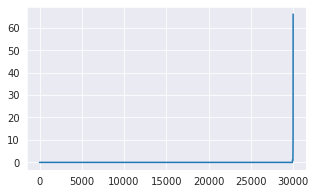

In [ ]:
distances1 = np.sort(distances1, axis = 0) # sorting the distances
distances1 = distances1[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances1) # plotting the distances
plt.show() # showing t

In [ ]:
dbscancluster1= DBSCAN(eps=3, min_samples=4)


In [ ]:
model1=dbscancluster1.fit(datasubset2)

In [ ]:
labels2=model1.labels_

In [ ]:
sample_cores1=np.zeros_like(labels2,dtype=bool)

In [ ]:
sample_cores1[dbscancluster1.core_sample_indices_]=True


In [ ]:
n_cluster1=len(set(labels2))- (1 if -1 in labels2 else 0)

**The number of clusters of subsample2 is 4**

In [ ]:
n_cluster1

4

In [ ]:

silhouette_score(datasubset2,labels2)

0.829864069411018

**DATASUBSET3**

In [ ]:
neighb2= NearestNeighbors(n_neighbors=5) 
nbrs2=neighb2.fit(datasubset3) 
distances2,indices2=nbrs2.kneighbors(datasubset3)

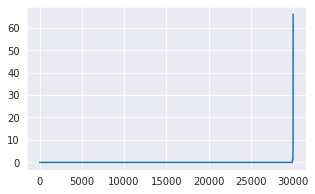

In [ ]:
distances2 = np.sort(distances2, axis = 0) # sorting the distances
distances2 = distances2[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances2) # plotting the distances
plt.show() # showing t


In [ ]:
dbscancluster2= DBSCAN(eps=3, min_samples=4)


In [ ]:
model2=dbscancluster2.fit(datasubset3)


In [ ]:
labels3=model2.labels_

In [ ]:
sample_cores2=np.zeros_like(labels3,dtype=bool)

In [ ]:
sample_cores2[dbscancluster2.core_sample_indices_]=True

In [ ]:
n_cluster2=len(set(labels3))- (1 if -1 in labels3 else 0)

**Number of cluster calculated is 4**

In [ ]:
n_cluster2

4

In [ ]:
silhouette_score(datasubset3,labels3)

0.829764515506286